<a href="https://colab.research.google.com/github/kosei-s/MachineLearningPractice/blob/master/chainer_tutorial/chainer_tutorial_note6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 14章

In [0]:
import chainer

In [0]:
chainer.print_runtime_info()

Platform: Linux-4.14.79+-x86_64-with-Ubuntu-18.04-bionic
Chainer: 5.4.0
NumPy: 1.16.4
CuPy:
  CuPy Version          : 5.4.0
  CUDA Root             : /usr/local/cuda
  CUDA Build Version    : 10000
  CUDA Driver Version   : 10000
  CUDA Runtime Version  : 10000
  cuDNN Build Version   : 7301
  cuDNN Version         : 7301
  NCCL Build Version    : 2402
  NCCL Runtime Version  : 2402
iDeep: 2.0.0.post3


In [0]:
from sklearn.datasets import load_iris

x, t = load_iris(return_X_y=True)

print('x: ', x.shape)
print('t: ', t.shape)

x:  (150, 4)
t:  (150,)


In [0]:
x = x.astype('float32')
t = t.astype('int32')

In [0]:
from sklearn.model_selection import train_test_split

x_train_val, x_test, t_train_val, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

In [0]:
x_train, x_val, t_train, t_val = train_test_split(x_train_val, t_train_val, test_size=0.3, random_state=0)

In [0]:
import chainer.links as L
import chainer.functions as F

In [0]:
from chainer import Sequential

n_input = 4
n_hidden = 10
n_output = 3

net = Sequential(
    L.Linear(n_input, n_hidden), F.relu,
    L.Linear(n_hidden, n_hidden), F.relu,
    L.Linear(n_hidden, n_output)
)

In [0]:
optimizer = chainer.optimizers.SGD(lr=0.01)

In [0]:
optimizer.setup(net)

In [0]:
n_epoch = 30
n_batchsize = 16

In [0]:
import numpy as np

In [0]:
iteration = 0

results_train = {
    'loss': [],
    'accuracy': []
}
results_valid = {
    'loss': [],
    'accuracy': []
}

for epoch in range(n_epoch):
  order = np.random.permutation(range(len(x_train)))
  
  loss_list = []
  accuracy_list = []
  
  for i in range(0, len(order), n_batchsize):
    index = order[i:i+n_batchsize]
    x_train_batch = x_train[index, :]
    t_train_batch = t_train[index]
    
    y_train_batch = net(x_train_batch)
    
    loss_train_batch = F.softmax_cross_entropy(y_train_batch, t_train_batch)
    accuracy_train_batch = F.accuracy(y_train_batch, t_train_batch)
    
    loss_list.append(loss_train_batch.array)
    accuracy_list.append(accuracy_train_batch.array)
    
    net.cleargrads()
    loss_train_batch.backward()
    
    optimizer.update()
    
    iteration += 1
  
  loss_train = np.mean(loss_list)
  accuracy_train = np.mean(accuracy_list)
  
  with chainer.using_config('train', False), chainer.using_config('enable_backprop', False):
    y_val = net(x_val)
  
  loss_val = F.softmax_cross_entropy(y_val, t_val)
  accuracy_val = F.accuracy(y_val, t_val)
  
  print('epoch: {}, iteration: {}, loss (train): {:.4f}, loss (valid): {:.4f}'.format(epoch, iteration, loss_train, loss_val.array))
  
  results_train['loss'].append(loss_train)
  results_train['accuracy'].append(accuracy_train)
  results_valid['loss'].append(loss_val.array)
  results_valid['accuracy'].append(accuracy_val.array)

epoch: 0, iteration: 5, loss (train): 1.2795, loss (valid): 1.0253
epoch: 1, iteration: 10, loss (train): 1.0393, loss (valid): 0.9688
epoch: 2, iteration: 15, loss (train): 0.9408, loss (valid): 0.9503
epoch: 3, iteration: 20, loss (train): 0.9264, loss (valid): 0.9344
epoch: 4, iteration: 25, loss (train): 0.9047, loss (valid): 0.9269
epoch: 5, iteration: 30, loss (train): 0.9015, loss (valid): 0.9155
epoch: 6, iteration: 35, loss (train): 0.8787, loss (valid): 0.9019
epoch: 7, iteration: 40, loss (train): 0.8591, loss (valid): 0.8982
epoch: 8, iteration: 45, loss (train): 0.8465, loss (valid): 0.8842
epoch: 9, iteration: 50, loss (train): 0.8449, loss (valid): 0.8629
epoch: 10, iteration: 55, loss (train): 0.8166, loss (valid): 0.8521
epoch: 11, iteration: 60, loss (train): 0.8242, loss (valid): 0.8277
epoch: 12, iteration: 65, loss (train): 0.7991, loss (valid): 0.8104
epoch: 13, iteration: 70, loss (train): 0.7714, loss (valid): 0.8098
epoch: 14, iteration: 75, loss (train): 0.768

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

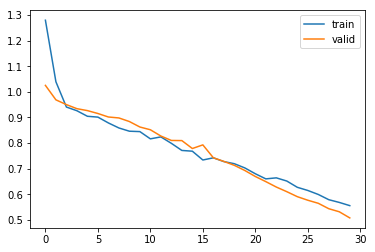

In [0]:
plt.plot(results_train['loss'], label='train')
plt.plot(results_valid['loss'], label='valid')
plt.legend()

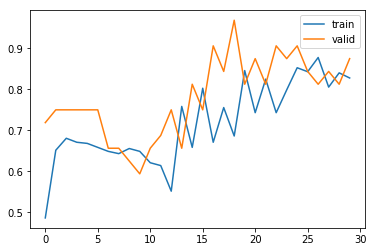

In [0]:
plt.plot(results_train['accuracy'], label='train')
plt.plot(results_valid['accuracy'], label='valid')
plt.legend()

In [0]:
with chainer.using_config('train', False), chainer.using_config('enable_backprop', False):
  y_test = net(x_test)

In [0]:
accuracy_test = F.accuracy(y_test, t_test)
accuracy_test.array

array(0.7111111, dtype=float32)

In [0]:
chainer.serializers.save_npz('my_iris.net', net)

In [0]:
!ls

my_iris.net  sample_data


In [0]:
loaded_net = Sequential(
    L.Linear(n_input, n_hidden), F.relu,
    L.Linear(n_hidden, n_hidden), F.relu,
    L.Linear(n_hidden, n_output)
)

In [0]:
chainer.serializers.load_npz('my_iris.net', loaded_net)

In [0]:
with chainer.using_config('train', False), chainer.using_config('enable_backprop', False):
  y_test = loaded_net(x_test)

In [0]:
np.argmax(y_test[0, :].array)

2